## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [3]:
# One time instalaltion may be required for version upgradaion of Scikit learn
!pip install --upgrade scikit-learn


In [4]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

import warnings
warnings.filterwarnings('ignore')

### 2. Load the dataset and display a sample of five rows of the data frame.

In [5]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
239739,No,21.63,No,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Very good,6.0,No,No,No
307053,No,22.31,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,6.0,No,No,Yes
76931,Yes,30.57,Yes,No,Yes,0.0,0.0,Yes,Male,60-64,White,Yes,Yes,Fair,8.0,No,No,No
5533,No,23.78,Yes,No,No,5.0,0.0,No,Female,60-64,White,No,No,Very good,7.0,No,No,No
257701,No,35.24,No,No,No,0.0,10.0,No,Male,55-59,Black,No,Yes,Excellent,7.0,Yes,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [6]:
df.shape

(319795, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [8]:
# Numerical coulumns

df.describe().T


,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [9]:
# Categorical Columns

df.describe(include='O').T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [10]:
(df.isnull().sum() / len(df)) * 100 

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [11]:
# Findling the duplicate rows
df.duplicated().sum()

18078

In [12]:
# Dropping all the duplicate rows & rechecking 

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
# Rechecking shape after dropping duplicates
df.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

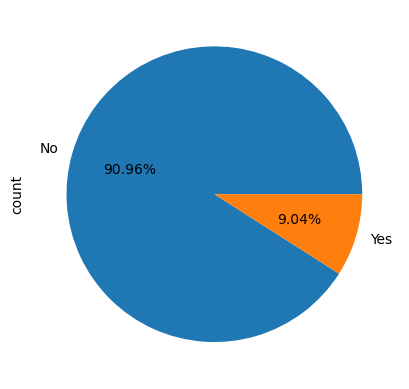

In [14]:
df['HeartDisease'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.plot

## Comments: There are almost 91% people with no-heart disease comparing to 9% people with heart disease.
##           The data looks highly skewed and asymmetric

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [15]:
# Finding the categorical columns
categorical_features = df.select_dtypes(include=[np.object_])
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

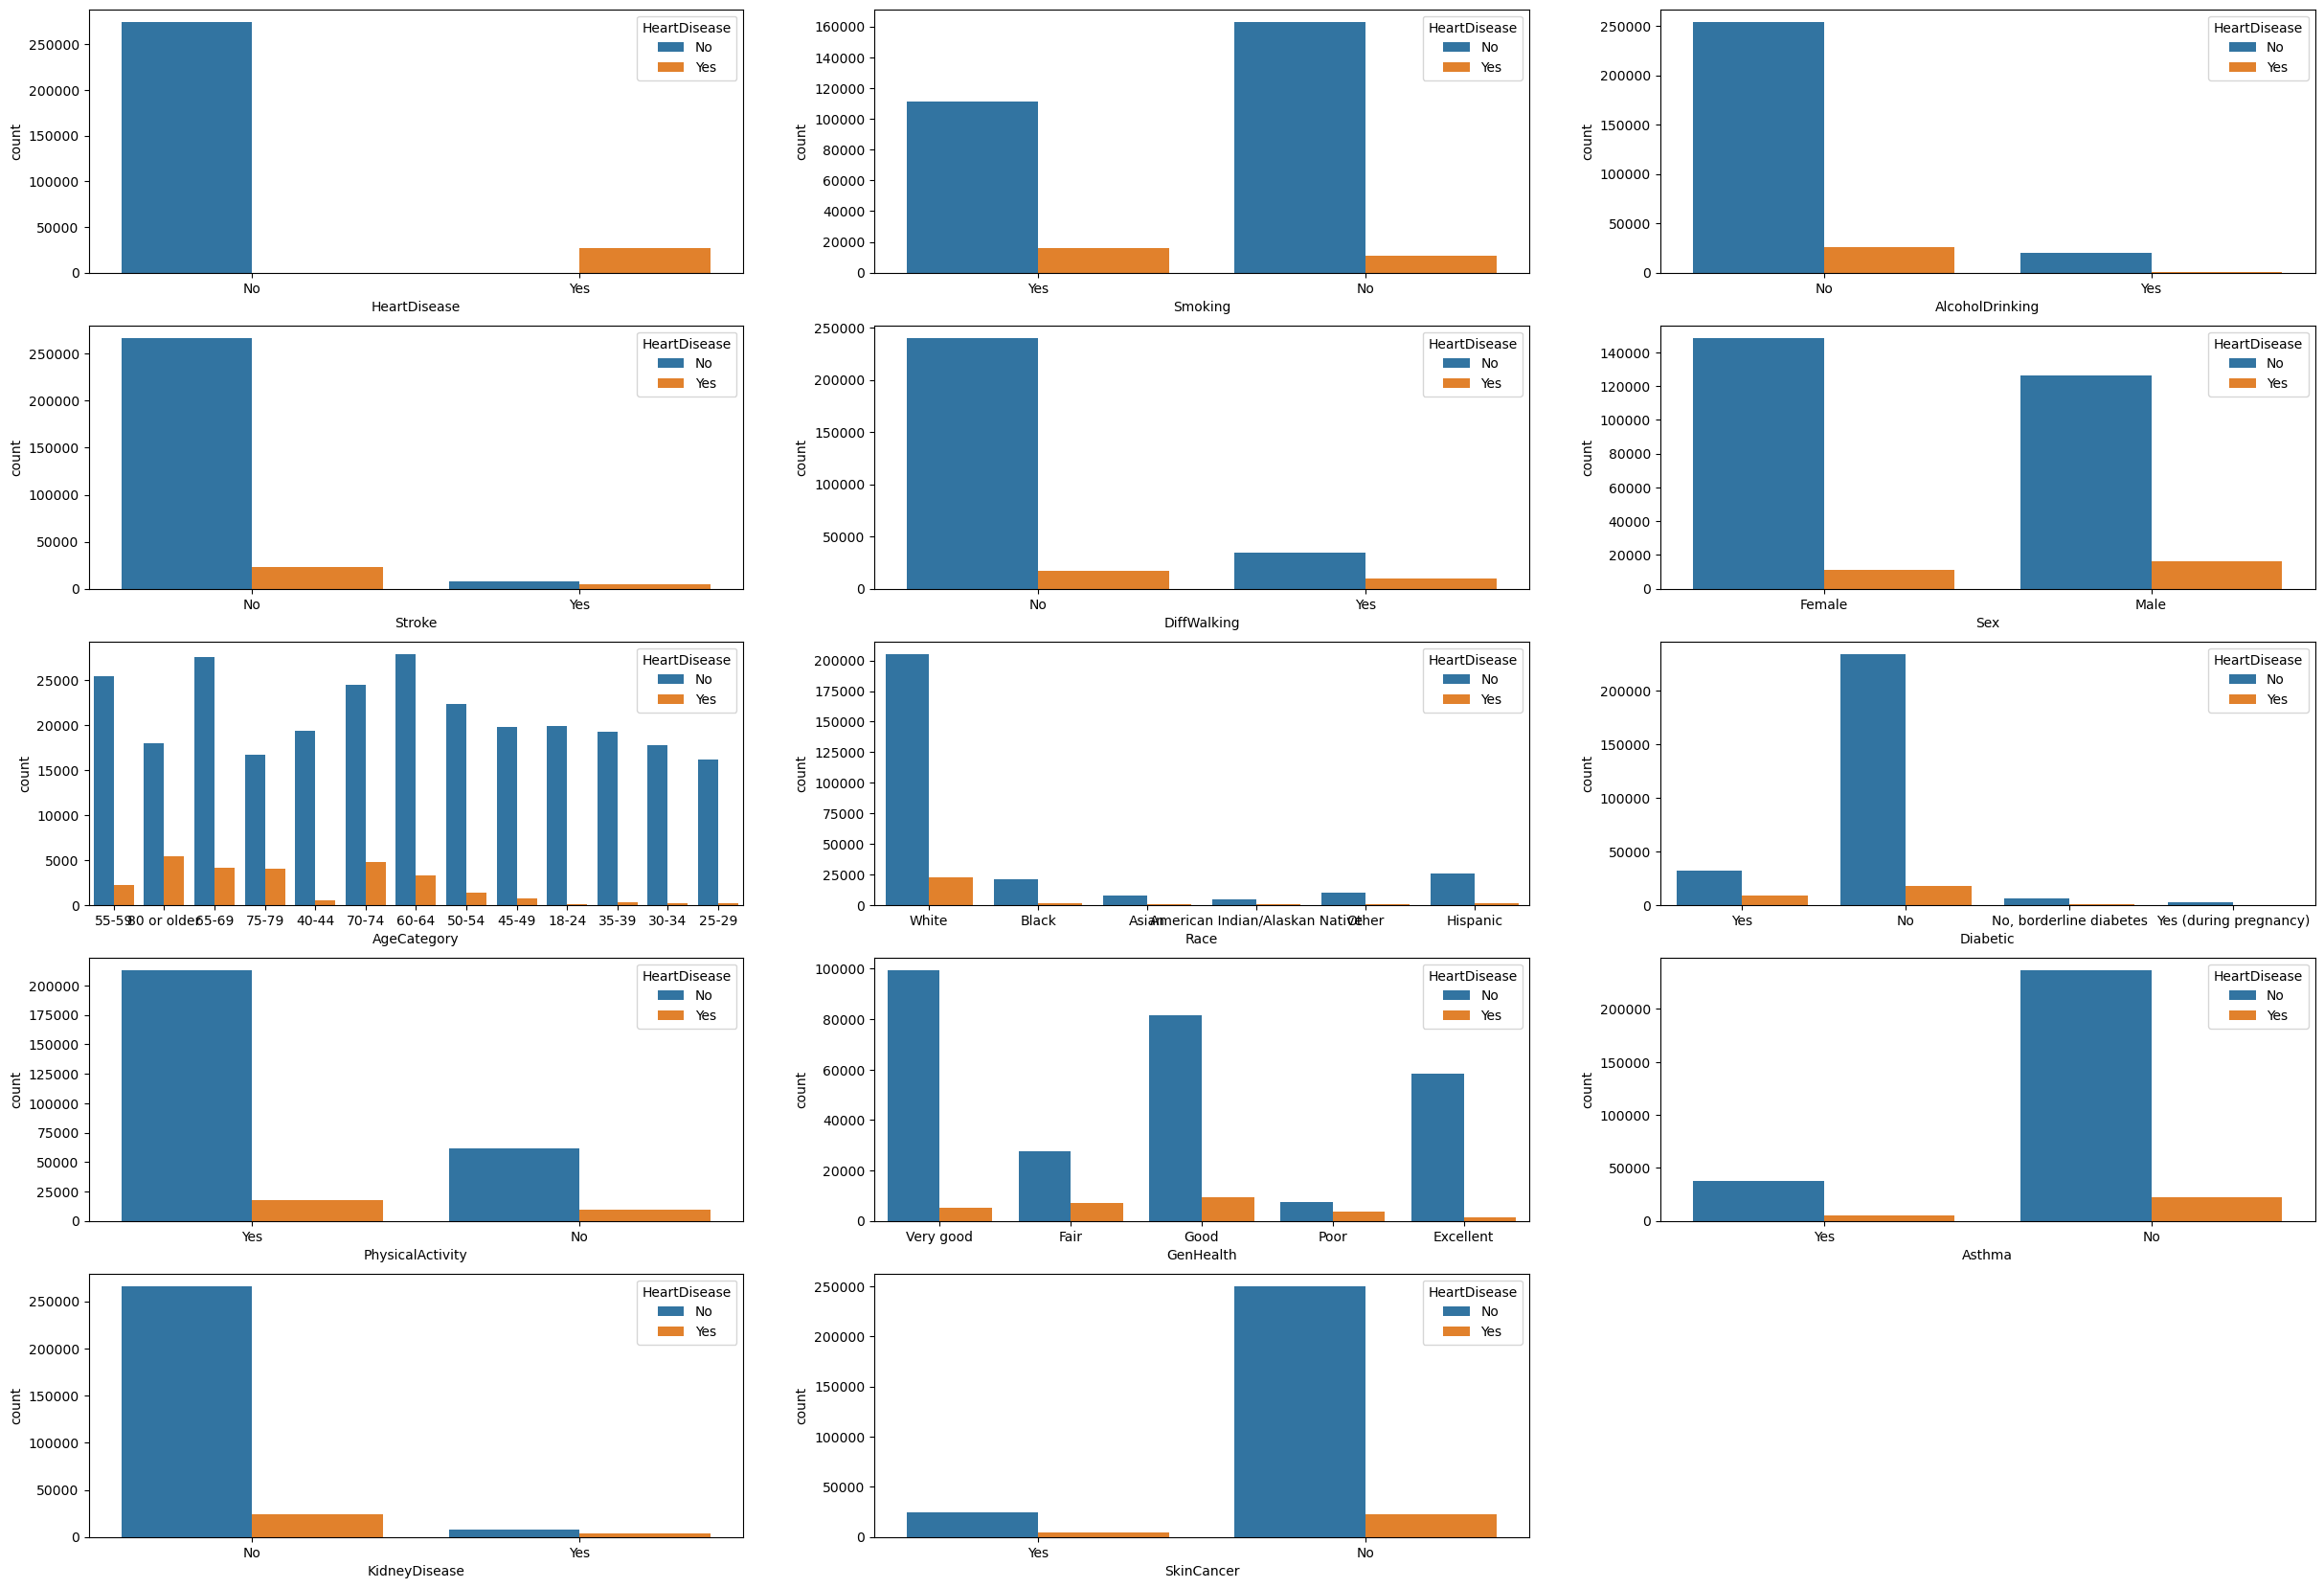

In [16]:
# Plotting HeartDisease against all categorical columns
i = 1
plt.figure(figsize= (30,25))

for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x= feature, hue='HeartDisease', data = df)
    i +=1
    
## Observations:: People with Alcohol Drinking shows almost negligible amount of people with Heart Disease.
#                 That is an interesting finding.
#                 In all other plots the people with no-heart disease is higher than people having heart disease.

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [17]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [18]:
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)':'Yes', 'No, borderline diabetes': 'No'})
df['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
df['Diabetic'].value_counts()

Diabetic
No     258572
Yes     43145
Name: count, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [20]:
df['HeartDisease'] = df['HeartDisease'].replace({'No':0,'Yes': 1})
df['HeartDisease'].value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [21]:
object_type_var = [i for i in df[["AgeCategory", "Race","GenHealth"]] if df.dtypes[i]==object]

le  = LabelEncoder()

def encoder(df):
    for i in object_type_var:
        conv = le.fit_transform(df[i].astype(str))
        df[i] = conv
        df[i] = df[i].astype(int)
encoder(df)

df = pd.get_dummies(df, drop_first=True)

df.sample(5)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
309678,1,47.24,3.0,0.0,9,5,1,7.0,False,False,False,True,False,True,False,False,False,False
13049,0,15.07,0.0,0.0,0,5,4,7.0,False,False,False,False,False,False,True,False,False,False
204671,0,26.91,14.0,0.0,7,5,4,8.0,True,True,False,True,True,False,True,False,False,False
32200,1,35.35,3.0,0.0,7,3,1,8.0,True,False,True,True,False,False,False,True,False,False
15397,0,39.58,0.0,30.0,7,5,4,6.0,False,False,False,False,True,False,True,False,False,False


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [22]:
# Splitting the Data into target Y columns & rest in X 

X= df.drop('HeartDisease', axis=1)
y = df['HeartDisease']



### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [23]:
# Implementing train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(211201, 17) (90516, 17)
(211201,) (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [24]:
# Standardizing all numerical columns using StandardScaler()

ss = StandardScaler()
X_train.iloc[:,:7] = ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = ss.fit_transform(X_test.iloc[:,:7])
X_train.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
103747,-0.023134,1.406059,0.720214,-0.143597,0.513469,1.176707,-0.055931,False,False,False,False,False,False,True,True,False,False
71487,1.207781,0.176699,1.333865,-1.260349,-0.295485,1.176707,-0.736853,True,False,False,False,True,False,True,False,False,False
155717,-0.332021,-0.437981,-0.261627,0.693966,0.513469,-1.467408,0.624992,True,False,False,False,False,False,True,False,False,False
53307,0.664140,-0.437981,0.106564,-1.539537,-0.295485,-1.467408,0.624992,True,False,False,False,True,False,True,False,False,False
37556,1.147548,-0.192109,1.947516,-0.981161,0.513469,-0.145351,-0.055931,False,False,False,False,True,False,True,False,False,False


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [26]:
#  Models implemented individually for memory allocation problem for a huge time and blocking the file

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [27]:
# Loading the models

logreg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()
gradboot_model = GradientBoostingClassifier()

In [ ]:
# Fitting the models individually due to memory constraint

In [28]:
logreg_model.fit(X_train,y_train)

LogisticRegression()

In [29]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [31]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
adaboost_model.fit(X_train,y_train)

AdaBoostClassifier()

In [34]:
gradboot_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [35]:
# Make predictions

logreg_preds = logreg_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
adaboost_preds = adaboost_model.predict(X_test)
gradboost_preds = gradboot_model.predict(X_test)

In [36]:
# Printing accuracy results of all the models

print("1. Logistic Regression Model => ", round(accuracy_score(y_test,logreg_preds),3))
print("2. K Nearest Neighbour Model => ", round(accuracy_score(y_test,knn_preds),3))
print("3. Naive Baise Model => ", round(accuracy_score(y_test,nb_preds),3))
print("4. Decision Tree Model => ",  round(accuracy_score(y_test,dt_preds),3))
print("5. Random Forest Model => ",round(accuracy_score(y_test,rf_preds),3))
print("6. Adaboost Model => ", round(accuracy_score(y_test,adaboost_preds),3))
print("7. Gradient Boost Model => ", round(accuracy_score(y_test,gradboost_preds),3))

1. Logistic Regression Model =>  0.911
2. K Nearest Neighbour Model =>  0.901
3. Naive Baise Model =>  0.841
4. Decision Tree Model =>  0.855
5. Random Forest Model =>  0.9
6. Adaboost Model =>  0.911
7. Gradient Boost Model =>  0.911


### Conclusion

In [ ]:
# After analyzing the accuracy score of all the models, we can conclude that
# the Gradient Boost Model gives the most accurate predictions (around 91.2%, whereas
# the Naive Baise Model gives the least accurate predictions (around 84.1%)
# as per our given Train & Test data

----
## Happy Learning:)
----